# Number Concept
Based on measure from Miller, K., & Gelman, R. (1983). The child's representation of number: A multidimensional scaling analysis. Child development, 1470-1479. [[link]](http://files.eric.ed.gov/fulltext/ED221271.pdf)


### Feature matrix

In [1]:
import numpy as np
from representations import mds, plot_dendrogram
import csv
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# testing whether number is prime
def is_prime(n):
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

In [3]:
# features: small; medium; large; even; odd; mult3; mult4; mult5; mult7; square; prime
nums = 30 # we'll go through the number 30

featmtx = np.zeros((nums-2,11)) # 

for i in range(2,nums): # we don't want to include 0 or 1
    if i < 10: # if number is under 10
        featmtx[i-2,0] = 1
    if 10 <= i < 20: # if number is in 10s
        featmtx[i-2,1] = 1
    if 20 <= i < 30: # if number is in 20s
        featmtx[i-2,2] = 1
    if i%2 == 0: # if number is even
        featmtx[i-2,3] = 1
    if i%2 != 0: # if number is odd
        featmtx[i-2,4] = 1
    if i%3 == 0: # multiple of 3
        featmtx[i-2,5] = 1
    if i%4 == 0: # multiple of 4
        featmtx[i-2,6] = 1
    if i%5 == 0: # multiple of 5
        featmtx[i-2,7] = 1
    if i%7 == 0: # multiple of 7
        featmtx[i-2,8] = 1
    if np.sqrt(i).is_integer(): # if the number is a square
        featmtx[i-2,9] = 1
    if is_prime(i) == True: # if prime
        featmtx[i-2,10] = 1

featmtx        
        

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 1., 0., 0.

In [4]:
# pick out features that are in common for each number to create similarity matrix

simmtx = np.zeros((nums-2,nums-2)) # empty similarity matrix

for i in range(len(featmtx)):
    for j in range(len(featmtx)):
        sim = 0
        for k,l in zip(featmtx[i],featmtx[j]):
            if k == l == 1:
                sim+= 1
            simmtx[i,j] = simmtx[j,i] = sim # number of in common attributes

simmtx = simmtx/11 # divide by total number of features we're counting

In [5]:
simmtx

array([[0.27272727, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
        0.18181818, 0.18181818, 0.09090909, 0.09090909, 0.09090909,
        0.09090909, 0.09090909, 0.09090909, 0.        , 0.09090909,
        0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.        ,
        0.09090909, 0.09090909, 0.09090909, 0.        , 0.09090909,
        0.        , 0.09090909, 0.09090909],
       [0.18181818, 0.36363636, 0.09090909, 0.27272727, 0.18181818,
        0.27272727, 0.09090909, 0.27272727, 0.        , 0.18181818,
        0.09090909, 0.18181818, 0.        , 0.18181818, 0.        ,
        0.18181818, 0.09090909, 0.18181818, 0.        , 0.18181818,
        0.        , 0.18181818, 0.09090909, 0.09090909, 0.        ,
        0.18181818, 0.        , 0.18181818],
       [0.18181818, 0.09090909, 0.36363636, 0.09090909, 0.18181818,
        0.09090909, 0.27272727, 0.18181818, 0.09090909, 0.        ,
        0.18181818, 0.        , 0.09090909, 0.        , 0.27272727,
        0.        , 0.0909

Text(0.5,1,'Multidimensional scaling')

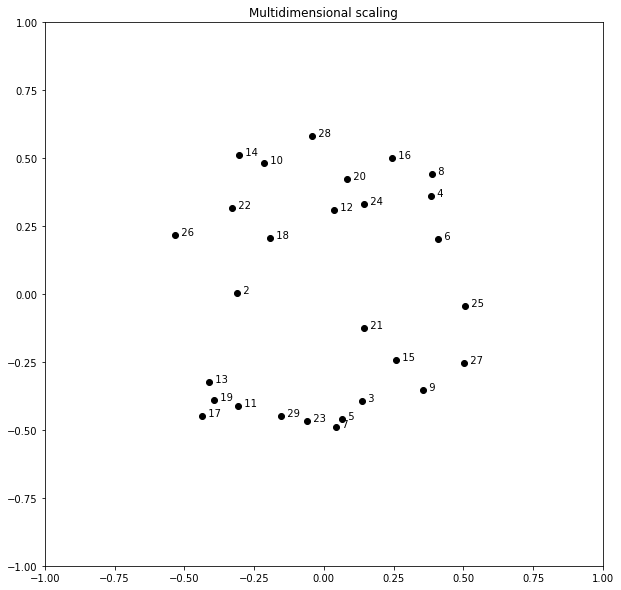

In [6]:
# create the figure
fig, axis = plt.subplots(figsize=(10,10))

points = mds(1 - simmtx)
axis.plot(points[:, 0], points[:, 1], 'ko')
axis.set_xlim(-1, 1)
axis.set_ylim(-1, 1)

for name, point in zip(range(2,30), points):
    axis.text(point[0], point[1], "  {}".format(name))
    
axis.set_title("Multidimensional scaling")
#savefig('Plots/MDS_total.png')

In [7]:
nums1 = [5, 8, 9, 11, 14, 16, 18, 20, 21, 29]
nums2 = [4, 6, 7, 10, 12, 13, 17, 25, 27, 28]
featmtx1 = [featmtx[i-2] for i in nums1]
featmtx2 = [featmtx[i-2] for i in nums2]

print(len(featmtx1))
print(len(featmtx2))

10
10


In [8]:
# create two similarity matrices based on both measures

simmtx1 = np.zeros((10,10)) # empty similarity matrix

for i in range(len(featmtx1)):
    for j in range(len(featmtx1)):
        sim = 0
        for k,l in zip(featmtx1[i],featmtx1[j]):
            if k == l == 1:
                sim+= 1
            simmtx1[i,j] = simmtx1[j,i] = sim 

simmtx1 = simmtx1/11 

simmtx2 = np.zeros((10,10)) # empty similarity matrix

for i in range(len(featmtx2)):
    for j in range(len(featmtx2)):
        sim = 0
        for k,l in zip(featmtx2[i],featmtx2[j]):
            if k == l == 1:
                sim+= 1
            simmtx2[i,j] = simmtx2[j,i] = sim

simmtx2 = simmtx2/11 

Text(0.5,1,'Multidimensional scaling')

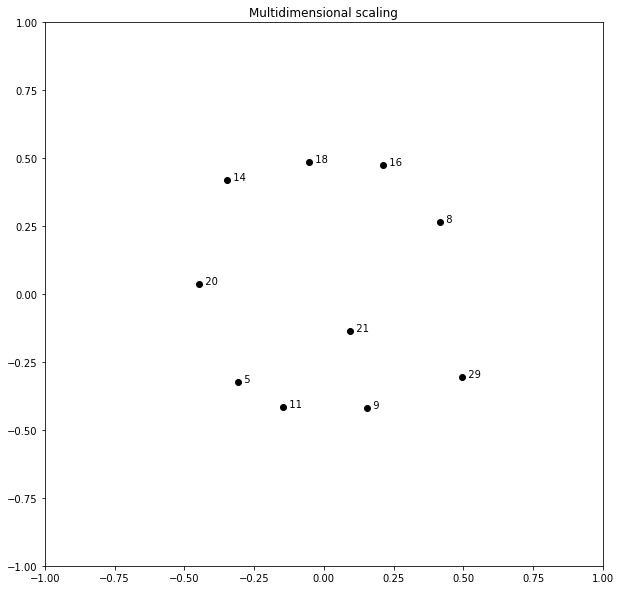

In [9]:
fig, axis = plt.subplots(figsize=(10,10))

points = mds(1 - simmtx1)
axis.plot(points[:, 0], points[:, 1], 'ko')
axis.set_xlim(-1, 1)
axis.set_ylim(-1, 1)

for name, point in zip(nums1, points):
    axis.text(point[0], point[1], "  {}".format(name))
    
axis.set_title("Multidimensional scaling")
#savefig('figs/MDS_1.png')

Text(0.5,1,'Multidimensional scaling')

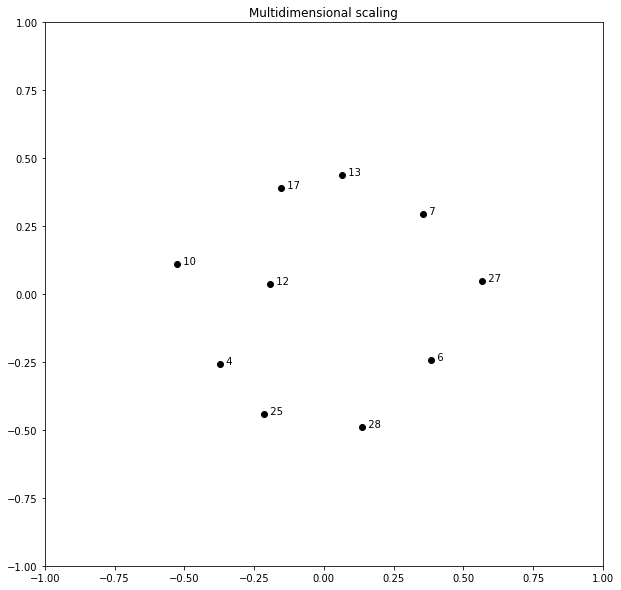

In [10]:
import matplotlib.pyplot as plt

# create the figure
fig, axis = plt.subplots(figsize=(10,10))

points = mds(1 - simmtx2)
axis.plot(points[:, 0], points[:, 1], 'ko')
axis.set_xlim(-1, 1)
axis.set_ylim(-1, 1)

for name, point in zip(nums2, points):
    axis.text(point[0], point[1], "  {}".format(name))
    
axis.set_title("Multidimensional scaling")
#savefig('figs/MDS_2.png')